In [124]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [125]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [126]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
## for data
import pandas as pd

import re
import nltk## for language detection

In [127]:
# train = pd.read_csv('c:/data/project/train.csv')
# test = pd.read_csv('c:/data/project/test.csv')

train = pd.read_csv('c:/data/project/train.csv')
test = pd.read_csv('c:/data/project/test.csv')

train.head()

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [128]:
df = train[['facts', 'first_party_winner']]
df_target = df[['first_party_winner']]
df_nlp = df[['facts']]
df_nlp1 = pd.DataFrame(df_nlp, columns=['facts'])
df_nlp1['facts'] = df_nlp1['facts'].str.replace(r'<[^<>]*>', '', regex=True)

dfTest = pd.DataFrame(test['facts'])
dfTest['facts'] = dfTest['facts'].str.replace(r'<[^<>]*>', '', regex=True)
dfTest



,facts
0,The 1984 Bail Reform Act allowed the federal c...
1,Lexecon Inc. was a defendant in a class action...
2,"In 2002 and 2003, Fox Television Stations broa..."
3,During his trial for armed robbery of a federa...
4,"In 1993, a magistrate judge issued a warrant a..."
...,...
1235,According to Executive Order No. 12807 signed ...
1236,Section 109(a) of the Clean Air Act (CAA) requ...
1237,Linda Matteo and John Madigan created a plan f...
1238,"In 1972, the North Carolina Board of Agricultu..."


In [129]:
import nltk
# nltk.download()

In [130]:
corpus = df_nlp1['facts']
# print(corpus.str.cat(sep=" ")) # 인덱스의 요소들 서로 잇기
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
lst_tokens

['On',
 'June',
 '27',
 ',',
 '1962',
 ',',
 'Phil',
 'St.',
 'Amant',
 ',',
 'a',
 'candidate',
 'for',
 'public',
 'office',
 ',',
 'made',
 'a',
 'television',
 'speech',
 'in',
 'Baton',
 'Rouge',
 ',',
 'Louisiana',
 '.',
 'During',
 'this',
 'speech',
 ',',
 'St.',
 'Amant',
 'accused',
 'his',
 'political',
 'opponent',
 'of',
 'being',
 'a',
 'Communist',
 'and',
 'of',
 'being',
 'involved',
 'in',
 'criminal',
 'activities',
 'with',
 'the',
 'head',
 'of',
 'the',
 'local',
 'Teamsters',
 'Union',
 '.',
 'Finally',
 ',',
 'St.',
 'Amant',
 'implicated',
 'Herman',
 'Thompson',
 ',',
 'an',
 'East',
 'Baton',
 'Rouge',
 'deputy',
 'sheriff',
 ',',
 'in',
 'a',
 'scheme',
 'to',
 'move',
 'money',
 'between',
 'the',
 'Teamsters',
 'Union',
 'and',
 'St.',
 'Amant',
 '’',
 's',
 'political',
 'opponent',
 '.',
 'Thompson',
 'successfully',
 'sued',
 'St.',
 'Amant',
 'for',
 'defamation',
 '.',
 'Louisiana',
 '’',
 's',
 'First',
 'Circuit',
 'Court',
 'of',
 'Appeals',
 'reve

In [131]:
ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()

In [132]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [133]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    import re
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [134]:
df_nlp1["facts_clean"] = df_nlp1["facts"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

In [135]:
df_nlp1

,facts,facts_clean
0,"On June 27, 1962, Phil St. Amant, a candidate ...",june 27 1962 phil st amant candidate public of...
1,Ramon Nelson was riding his bike when he suffe...,ramon nelson riding bike suffered lethal blow ...
2,An Alabama state court convicted Billy Joe Mag...,alabama state court convicted billy joe magwoo...
3,Victor Linkletter was convicted in state court...,victor linkletter convicted state court eviden...
4,"On April 24, 1953 in Selma, Alabama, an intrud...",april 24 1953 selma alabama intruder broke apa...
...,...,...
2473,Congress amended the Clean Air Act through the...,congress amended clean air act energy policy a...
2474,"Alliance Bond Fund, Inc., an investment fund, ...",alliance bond fund inc investment fund purchas...
2475,"In 1992, the District Court sentenced Manuel D...",1992 district court sentenced manuel peguero 2...
2476,"On March 8, 1996, Enrico St. Cyr, a lawful per...",march 8 1996 enrico st cyr lawful permanent re...


In [136]:
df_nlp2 = pd.concat([df_nlp1,df_target['first_party_winner']],axis=1, join='inner')
df_nlp2

,facts,facts_clean,first_party_winner
0,"On June 27, 1962, Phil St. Amant, a candidate ...",june 27 1962 phil st amant candidate public of...,1
1,Ramon Nelson was riding his bike when he suffe...,ramon nelson riding bike suffered lethal blow ...,0
2,An Alabama state court convicted Billy Joe Mag...,alabama state court convicted billy joe magwoo...,1
3,Victor Linkletter was convicted in state court...,victor linkletter convicted state court eviden...,0
4,"On April 24, 1953 in Selma, Alabama, an intrud...",april 24 1953 selma alabama intruder broke apa...,1
...,...,...,...
2473,Congress amended the Clean Air Act through the...,congress amended clean air act energy policy a...,1
2474,"Alliance Bond Fund, Inc., an investment fund, ...",alliance bond fund inc investment fund purchas...,1
2475,"In 1992, the District Court sentenced Manuel D...",1992 district court sentenced manuel peguero 2...,0
2476,"On March 8, 1996, Enrico St. Cyr, a lawful per...",march 8 1996 enrico st cyr lawful permanent re...,0


In [137]:
df_nlp2['first_party_winner'].value_counts()


first_party_winner
1    1649
0     829
Name: count, dtype: int64

In [138]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

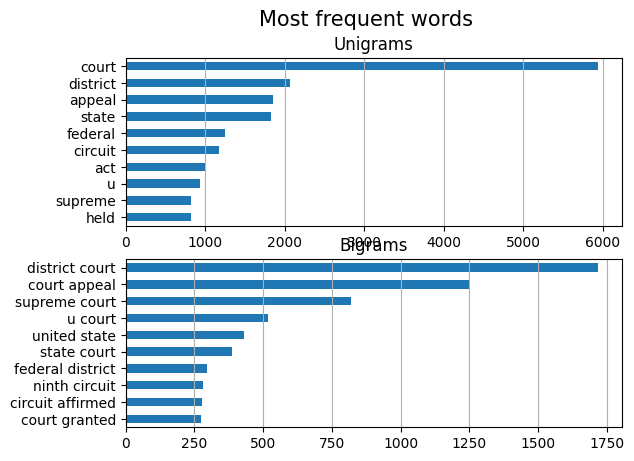

In [139]:
y = 1
corpus = df_nlp2[df_nlp2["first_party_winner"]== y]["facts_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.suptitle("Most frequent words", fontsize=15)
#figure(figsize=(30, 24))
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

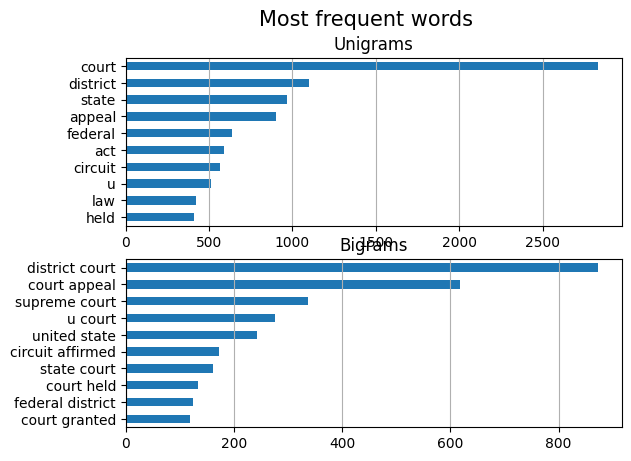

In [140]:
y = 0
corpus = df_nlp2[df_nlp2["first_party_winner"]== y]["facts_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.suptitle("Most frequent words", fontsize=15)
#figure(figsize=(30, 24))
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

In [141]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [142]:
import wordcloud

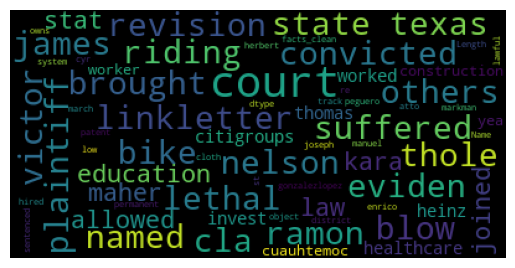

In [143]:
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [144]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [145]:
import gensim
import gensim.downloader as gensim_api
import seaborn as sns

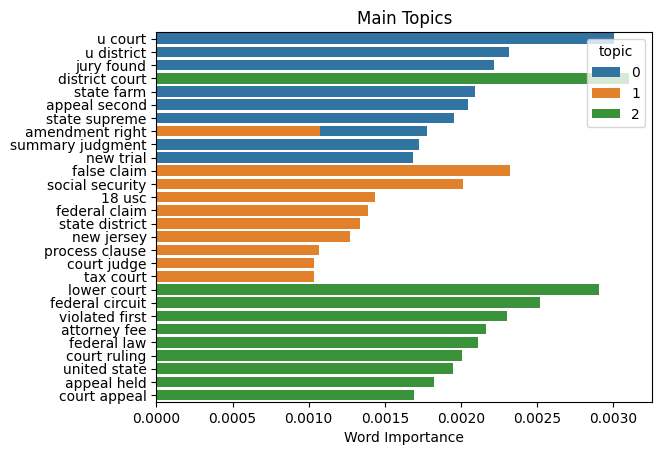

In [146]:
y = 1
corpus = df_nlp2[df_nlp2["first_party_winner"]==y]["facts_clean"]
## pre-process corpus
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, 
                     len(lst_words), 2)]
    lst_corpus.append(lst_grams)## map words to an id
id2word = gensim.corpora.Dictionary(lst_corpus)## create dictionary word:freq
dic_corpus = [id2word.doc2bow(word) for word in lst_corpus] ## train LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=7, random_state=123, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
   
## output
lst_dics = []
for i in range(0,3):
    lst_tuples = lda_model.get_topic_terms(i)
    for tupla in lst_tuples:
        lst_dics.append({"topic":i, "id":tupla[0], 
                         "word":id2word[tupla[0]], 
                         "weight":tupla[1]})
dtf_topics = pd.DataFrame(lst_dics, 
                         columns=['topic','id','word','weight'])

## plot
fig, ax = plt.subplots()
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')
ax.set(ylabel="", xlabel="Word Importance")
plt.show()

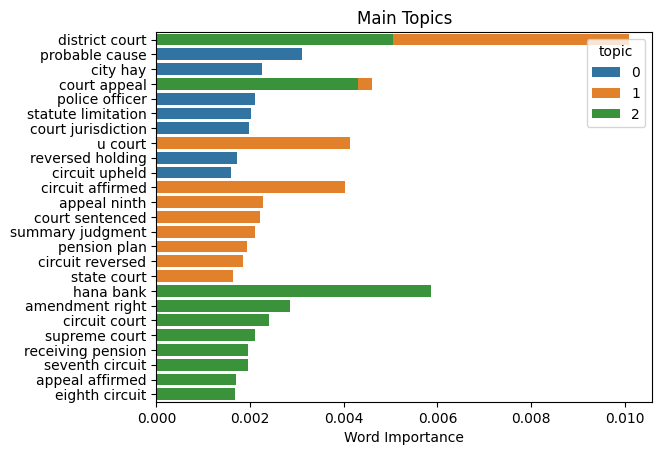

In [147]:
y = 0
corpus = df_nlp2[df_nlp2["first_party_winner"]==y]["facts_clean"]
## pre-process corpus
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, 
                     len(lst_words), 2)]
    lst_corpus.append(lst_grams)## map words to an id
id2word = gensim.corpora.Dictionary(lst_corpus)## create dictionary word:freq
dic_corpus = [id2word.doc2bow(word) for word in lst_corpus] ## train LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=7, random_state=123, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
   
## output
lst_dics = []
for i in range(0,3):
    lst_tuples = lda_model.get_topic_terms(i)
    for tupla in lst_tuples:
        lst_dics.append({"topic":i, "id":tupla[0], 
                         "word":id2word[tupla[0]], 
                         "weight":tupla[1]})
dtf_topics = pd.DataFrame(lst_dics, 
                         columns=['topic','id','word','weight'])

## plot
fig, ax = plt.subplots()
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')
ax.set(ylabel="", xlabel="Word Importance")
plt.show()

In [148]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [149]:
vectorizer = CountVectorizer()

In [150]:
df_nlp2 = pd.concat([df_nlp1,df_target['first_party_winner']],axis=1, join='inner')

In [151]:
dfTest["facts_clean"] = dfTest["facts"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
dfTest

,facts,facts_clean
0,The 1984 Bail Reform Act allowed the federal c...,1984 bail reform act allowed federal court det...
1,Lexecon Inc. was a defendant in a class action...,lexecon inc defendant class action lawsuit 28 ...
2,"In 2002 and 2003, Fox Television Stations broa...",2002 2003 fox television station broadcast bil...
3,During his trial for armed robbery of a federa...,trial armed robbery federally insured saving l...
4,"In 1993, a magistrate judge issued a warrant a...",1993 magistrate judge issued warrant authorizi...
...,...,...
1235,According to Executive Order No. 12807 signed ...,according executive order 12807 signed preside...
1236,Section 109(a) of the Clean Air Act (CAA) requ...,section 109a clean air act caa requires enviro...
1237,Linda Matteo and John Madigan created a plan f...,linda matteo john madigan created plan utilizi...
1238,"In 1972, the North Carolina Board of Agricultu...",1972 north carolina board agriculture adopted ...


In [152]:
X_train = df_nlp2['facts_clean']
y_train = df_nlp2['first_party_winner']

X_test = dfTest['facts_clean']
dfTest['first_party_winner'] = np.zeros(len(dfTest)).astype(int)
y_test = dfTest['first_party_winner']

In [153]:
# X_train, X_test, y_train, y_test = train_test_split(xfeatures,ylabel, test_size=0.25)

In [154]:
pipe = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(solver='liblinear'))])

In [155]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(solver='liblinear'))])

In [156]:
# pipe.score(X_test,y_test)

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [158]:
pipe1= Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier())])

In [159]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier())])

In [160]:
pipe1.score(X_train,y_train)

1.0

In [161]:
pipe1.score(X_test,y_test)

0.027419354838709678

In [162]:
pipe2= Pipeline(steps=[('cv',CountVectorizer()),('rf',KNeighborsClassifier(n_neighbors=3))])

In [163]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('rf', KNeighborsClassifier(n_neighbors=3))])

In [164]:
pipe2.score(X_train,y_train)

0.7570621468926554

In [165]:
pipe2.score(X_test,y_test)

0.16451612903225807

In [166]:
vectorize=CountVectorizer()

In [167]:
count_matrix = vectorize.fit_transform(df_nlp2['facts_clean'])
count_array = count_matrix.toarray()
data_final = pd.DataFrame(data=count_array,columns = vectorize.get_feature_names_out())
data_final


,011119,0125,02,036539,04,041352,041581,0479,05,0511287,...,zj,zone,zoned,zoneofinterests,zoning,zubik,zuni,zurich,zurko,zurkos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
data_final = pd.concat([data_final,df_nlp2["first_party_winner"]],axis=1,join='inner')

In [169]:
data_final

,011119,0125,02,036539,04,041352,041581,0479,05,0511287,...,zone,zoned,zoneofinterests,zoning,zubik,zuni,zurich,zurko,zurkos,first_party_winner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
count_matrix = vectorize.fit_transform(X_test)
count_array = count_matrix.toarray()
data_final_test = pd.DataFrame(data=count_array,columns = vectorize.get_feature_names_out())
data_final_test = pd.concat([data_final_test,dfTest["first_party_winner"]],axis=1,join='inner')
data_final_test

,01657,019,045323,053,074,10,100,1000,10000,100000,...,zimmer,zobrest,zobrests,zone,zoned,zoning,zt,zurcher,zurchers,first_party_winner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
X_train = data_final.drop(columns=['first_party_winner'])
y_train = data_final['first_party_winner']

X_test = data_final_test.drop(columns=['first_party_winner'])
y_test = data_final_test['first_party_winner']

In [172]:
# X_train, X_test, y_train, y_test = train_test_split(data_final.drop(columns=['first_party_winner']), data_final['first_party_winner'], test_size=0.3,random_state=10)

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_final = scaler.fit_transform(data_final)

In [174]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=200, random_state=0)
lda_data = lda.fit_transform(X_train)

KeyboardInterrupt: 

In [ ]:
lda_data_train = pd.DataFrame(data=lda_data)

In [ ]:
lda_data_test = pd.DataFrame(data=lda.transform(X_test))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 01657
- 019
- 045323
- 053
- 074
- ...
Feature names seen at fit time, yet now missing:
- 011119
- 0125
- 02
- 036539
- 04
- ...


In [ ]:
rand=RandomForestClassifier(max_depth= 8, max_features = 100, min_samples_leaf = 2, n_estimators = 200)

In [ ]:
rand.fit(lda_data_train,y_train)

RandomForestClassifier(max_depth=8, max_features=100, min_samples_leaf=2,
                       n_estimators=200)

In [ ]:
rand.score(lda_data_train,y_train)

0.6997578692493946

In [ ]:
rand.score(lda_data_test,y_test)

0.6214689265536724

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
y_pred1 = rand.predict(lda_data_test)
f1_score(y_test, y_pred1)

0.7538057742782152

In [ ]:
print(len(lda_data_test))
print(len(lda_data_train))
print(len(y_train))

1239
1239
1239


In [ ]:
model = XGBClassifier()
model.fit(lda_data_train, y_train)
y_pred = model.predict(lda_data_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f1_score(y_test, y_pred1)


Accuracy: 56.09%


0.7538057742782152

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(lda_data_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.score(lda_data_train,y_train)

0.7247780468119451

In [ ]:
knn.score(lda_data_test,y_test)

0.6238902340597255

In [ ]:
# predictions[-6]
len(predictions)
pd.DataFrame(predictions)

,0
0,0
1,1
2,0
3,1
4,1
...,...
1234,1
1235,1
1236,1
1237,1


In [ ]:
submit = pd.read_csv('C:/data/project/sample_submission.csv')
predcsv = pd.DataFrame(predictions,columns=['first_party_winner'])
# submit['first_party_winner'] = predictions
# predcsv
submit['first_party_winner'] = predcsv
submit.to_csv('./baseline_submit.csv', index=False)
print('Done')

PermissionError: [Errno 13] Permission denied: './baseline_submit.csv'

In [ ]:
# import numpy as np
# from keras.preprocessing import sequence
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
# n_unique_words = 10000 # cut texts after this number of words
# maxlen = 2000
# batch_size = 32

In [ ]:
# model = Sequential()
# model.add(Embedding(n_unique_words, 128, input_length=maxlen))
# model.add(LSTM(64))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Inference & Submission

submit = pd.read_csv('./sample_submission.csv')

pred = model.predict(X_test)

submit['first_party_winner'] = pred
submit.to_csv('./baseline_submit.csv', index=False)
print('Done')